In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
# cargamos df
empleos = pd.read_csv("jobs_opcionempleo.csv", sep=';' )
empleos

,Cargo,Ciudad,Empresa,Fecha_publicacion,Permanencia,Horario
0,DESARROLLADOR REACT,Quito,LOGIC STUDIO S.A.,Hace 17 horas,Permanente,Tiempo completo
1,DESARROLLADOR JR l FUTURO TALENTO TI,Quito,Banco Pichincha,Hace 22 horas,Permanente,Tiempo completo
2,DESARROLLADOR JR l FUTURO TALENTO TI,Ecuador,Banco Pichincha,Hace 21 horas,Permanente,Tiempo completo
3,Desarrollador FrontEnd Aplicaciones empresariales,Quito,Experteam Cia. Ltda.,Hace 21 horas,Permanente,Tiempo completo
4,Desarrollador Full Stack,Guayaquil,VIAMATICA S.A.,Hace 2 días,Permanente,Tiempo completo
...,...,...,...,...,...,...
275,Analista programador Experiencia Odoo Aplicaci...,Quito,Protelcotelsa S.A.,Hace 29 días,Permanente,Tiempo completo
276,QA engineer,Quito,Easysoft S. A.,Hace 30 días,Permanente,Tiempo completo
277,Desarrollador de Sofware Guayaquil Presencial,Guayaquil,Easysoft S. A.,Hace 30 días,Permanente,Tiempo completo
278,Analista y desarrollador de software Quito Pre...,Quito,Easysoft S. A.,Hace 30 días,Permanente,Tiempo completo


In [5]:
empleos.describe()

,Cargo,Ciudad,Empresa,Fecha_publicacion,Permanencia,Horario
count,280,280,270,280,280,280
unique,213,23,131,37,11,3
top,Desarrollador de Software .Net Senior,Quito,Banco Pichincha,Hace 29 días,Permanente,Tiempo completo
freq,5,153,18,55,265,269


# ¿Cuál es el número de ofertas laborales para desarrollador dentro de la plataforma, general y por  localidad?

                                Cargo
Ciudad                               
Ambato                              3
Azuay                               1
Cuenca                              9
Ecuador                            23
Esmeraldas                          1
Guayaquil                          60
Guayas                              7
Ibarra                              1
Latacunga                           1
Machala                             1
Manta                               3
Mocha                               4
Nobol                               1
Otavalo                             1
Pedernales                          1
Portoviejo                          1
Quevedo                             1
Quito                             153
Rumiñahui                           1
San Lorenzo                         1
Santo Domingo de los Colorados      4
Tungurahua                          1
Ventanas                            1


array([<AxesSubplot:ylabel='Cargo'>], dtype=object)

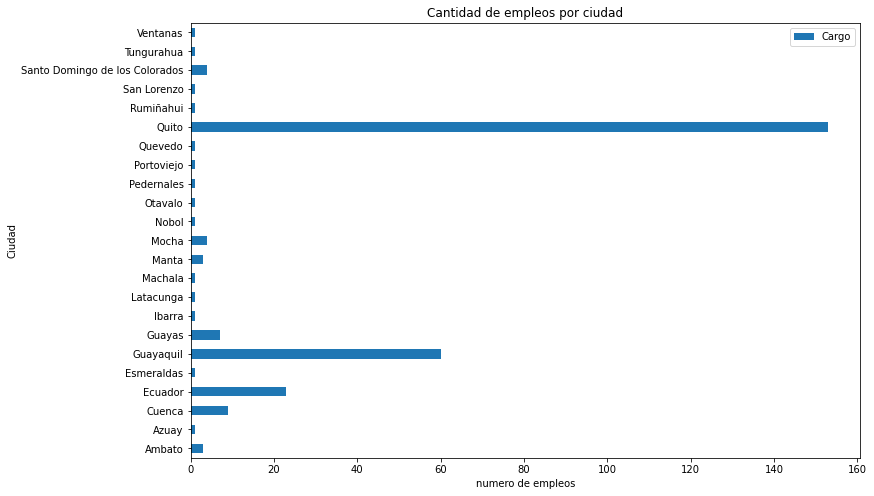

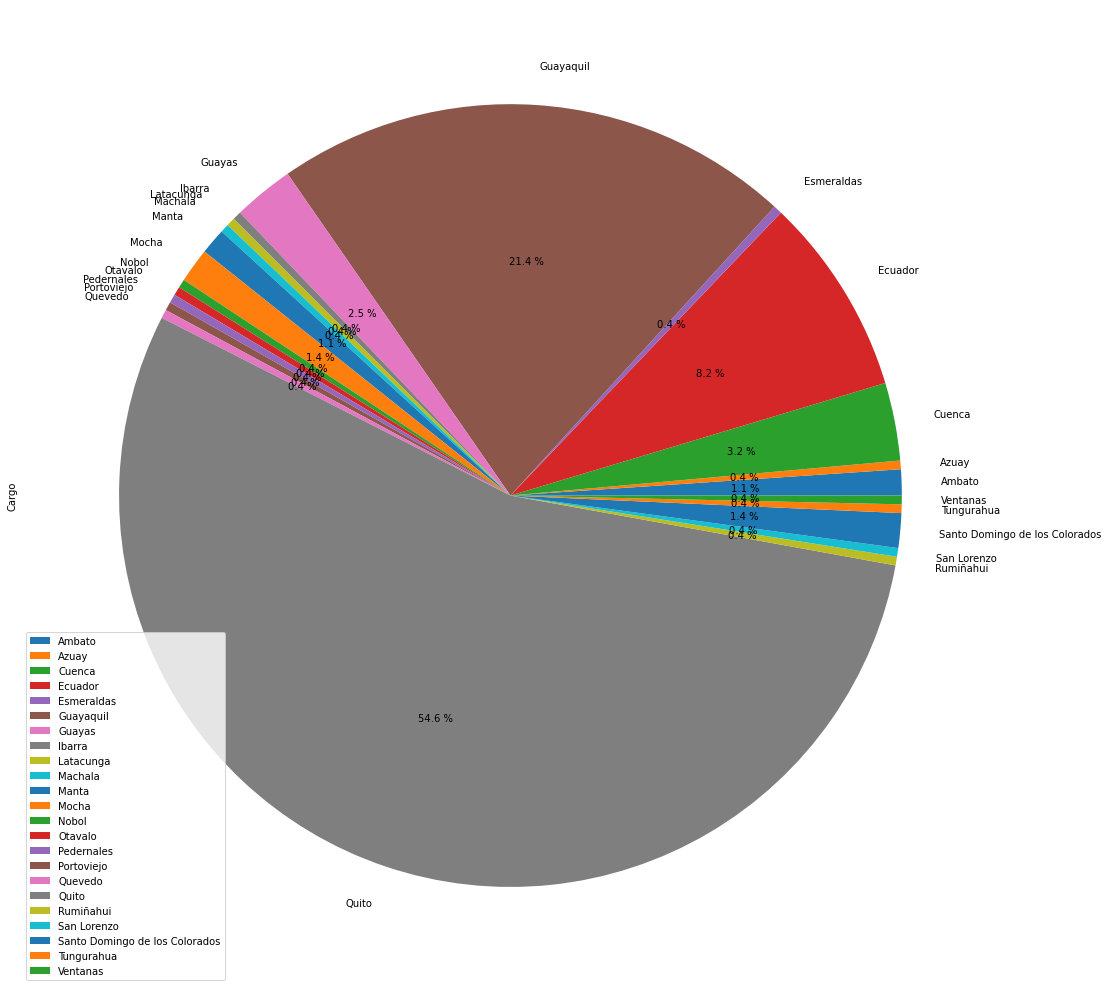

In [6]:
# conteo de numero de empleos por ciudad 
temp = empleos[['Ciudad','Cargo']]
countt= temp.groupby('Ciudad').count()
print(countt)
countt.plot(kind='barh', figsize=[12,8])
plt.xlabel('numero de empleos')
plt.title('Cantidad de empleos por ciudad')
countt.plot.pie(subplots=True,figsize=(28, 18), autopct="%0.1f %%")

In [7]:
empleos['Horario'].unique()

array(['Tiempo completo', 'Permanente', 'Tiempo parcial'], dtype=object)

In [8]:
empleos['Permanencia'].unique()

array(['Permanente', '800 USD al mes', 'Autónomo', '700-800 USD al mes',
       '500-600 USD al mes', '600-1.200 USD al mes', 'Temporal',
       'Prácticas', '1.200-1.600 USD al mes', '700 USD al mes',
       '24.000-54.000 USD al año'], dtype=object)

# ¿Cuál es el rango de sueldo para desarrolladores dentro de la plataforma?

# ¿Cuál o cuáles son modos de permanecía laboral dentro de la plataforma?

In [9]:
#ya que notamos que hay valores distintos permanete, autómo, temporal
#filtramos para conservar los valores que necesitamos
#jornadas = empleos[empleos['Permanencia'].isin(['Permanente', 'Temporal' ])]
empleos.groupby('Permanencia').count()

,Cargo,Ciudad,Empresa,Fecha_publicacion,Horario
Permanencia,,,,,
1.200-1.600 USD al mes,2,2,2,2,2
24.000-54.000 USD al año,1,1,1,1,1
500-600 USD al mes,1,1,1,1,1
600-1.200 USD al mes,2,2,2,2,2
700 USD al mes,1,1,1,1,1
700-800 USD al mes,1,1,1,1,1
800 USD al mes,1,1,1,1,1
Autónomo,3,3,3,3,3
Permanente,265,265,256,265,265


In [10]:
empleos.groupby('Horario').count()

,Cargo,Ciudad,Empresa,Fecha_publicacion,Permanencia
Horario,,,,,
Permanente,9,9,9,9,9
Tiempo completo,269,269,259,269,269
Tiempo parcial,2,2,2,2,2


In [11]:
empleos[["Ciudad", "Empresa","Fecha_publicacion", "Permanencia","Horario"]].groupby('Ciudad')

# ¿Cuál es el comportamiento de las publicaciones de ofertas laborales dentro de la plataforma opcionempleo.com?

In [12]:
# funcion para cabiar las fechas a una con la que se pueda hacer una serie de tiempo 
# los ultimos datos fueron tomados el 27-8-2022
def change_fecha (fechaPublicacion):
    temp = fechaPublicacion.strip().split()
    fechaScaping = datetime.strptime("27-8-2022", '%d-%m-%Y').date()
    if 'horas' in temp:
        return str(fechaScaping )#no cambia la fecha 
    if 'días' in temp:
        return str(fechaScaping -  timedelta(days=int(temp[1])))
    if 'mes' in temp:
        return str(fechaScaping -  timedelta(days=30))
    if 'meses' in temp:
        return str(fechaScaping -  timedelta(days=(int(temp[1])*30)))
    

In [13]:
empleos["Fecha_publicacion"] = empleos["Fecha_publicacion"].apply(change_fecha) 
empleos

,Cargo,Ciudad,Empresa,Fecha_publicacion,Permanencia,Horario
0,DESARROLLADOR REACT,Quito,LOGIC STUDIO S.A.,2022-08-27,Permanente,Tiempo completo
1,DESARROLLADOR JR l FUTURO TALENTO TI,Quito,Banco Pichincha,2022-08-27,Permanente,Tiempo completo
2,DESARROLLADOR JR l FUTURO TALENTO TI,Ecuador,Banco Pichincha,2022-08-27,Permanente,Tiempo completo
3,Desarrollador FrontEnd Aplicaciones empresariales,Quito,Experteam Cia. Ltda.,2022-08-27,Permanente,Tiempo completo
4,Desarrollador Full Stack,Guayaquil,VIAMATICA S.A.,2022-08-25,Permanente,Tiempo completo
...,...,...,...,...,...,...
275,Analista programador Experiencia Odoo Aplicaci...,Quito,Protelcotelsa S.A.,2022-07-29,Permanente,Tiempo completo
276,QA engineer,Quito,Easysoft S. A.,2022-07-28,Permanente,Tiempo completo
277,Desarrollador de Sofware Guayaquil Presencial,Guayaquil,Easysoft S. A.,2022-07-28,Permanente,Tiempo completo
278,Analista y desarrollador de software Quito Pre...,Quito,Easysoft S. A.,2022-07-28,Permanente,Tiempo completo


In [14]:
grupos = empleos[["Fecha_publicacion", "Cargo"]].groupby("Fecha_publicacion").count()
grupos

,Cargo
Fecha_publicacion,
2022-06-28,37
2022-07-28,36
2022-07-29,55
2022-07-30,7
2022-07-31,9
2022-08-02,2
2022-08-03,4
2022-08-04,14
2022-08-05,10


Text(0.5, 1.0, 'Plazas laborales publicadas por fecha')

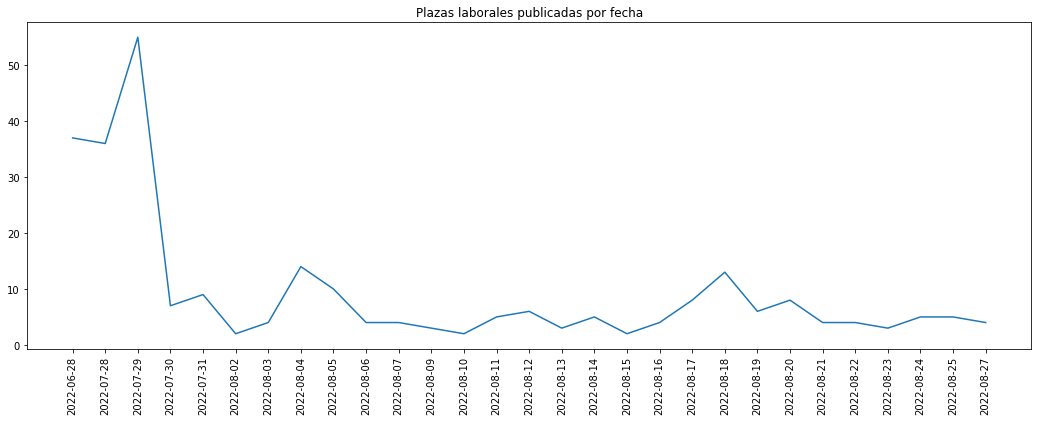

In [15]:
plt.figure(figsize=(18,6))
plt.plot(grupos)
plt.xticks(rotation=90)
plt.title("Plazas laborales publicadas por fecha")


# ¿Cuál es el promedio de ofertas laborales para desarrolladores en cada ciudad principal (Guayaquil, Quito, Cuenca) del Ecuador dentro de las 3 plataformas?